In [1]:
import nibabel as nib
import sys

In [44]:
input_dataset = r'C:\Users\acer\Desktop\Project_TMJOA\Data\47-4881 L 2014_preprocessed.nii.gz'  # Replace with actual input dataset path
nifti_img = nib.load(input_dataset)
data = nifti_img.get_fdata()

print(sys.getsizeof(data))
print(data.dtype, data.shape)
layer0 = data[101,:,:]

144
float64 (256, 256, 256)


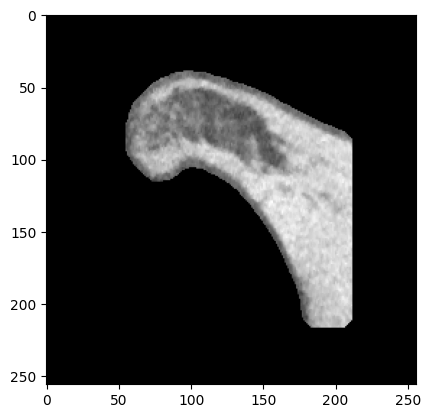

In [52]:
import matplotlib.pyplot as plt

num = 150
plt.imshow(data[num, :, :], cmap='gray')

In [14]:
import numpy as np

non_zero_pixel = np.count_nonzero(data, axis=1)
non_zero_pixel_by_slice = non_zero_pixel.sum(axis=1)

distribution1 = non_zero_pixel_by_slice / non_zero_pixel_by_slice.sum()
non_zero_pixel_by_slice

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,    44,   135,
         389,   562,   701,   897,  1185,  1376,  1532,  1740,  1944,
        2107,  2275,  2457,  2637,  2807,  2973,  3147,  3302,  3465,
        3590,  3730,  3851,  3979,  4111,  4250,  4394,  4525,  4673,
        4797,  4944,  5128,  5292,  5434,  5644,  5892,  6075,  6311,
        7420,  7893,  8192,  8531,  8865,  9148,  9377,  9659,  9912,
       10110, 10317, 10498, 10662, 10813, 10994, 11151, 11275, 11418,
       11566, 11696, 11815, 11967, 12124, 12269, 12442, 12660, 12863,
       13043, 13226,

In [17]:
import numpy as np

layer_non_zero_pixel = []
for layer_num in range(data.shape[0]):
    layer = data[layer_num, :, :]
    non_zero_pixel = np.count_nonzero(layer)
    layer_non_zero_pixel.append(non_zero_pixel)

layer_non_zero_pixel = np.array(layer_non_zero_pixel)
distribution2 = layer_non_zero_pixel / layer_non_zero_pixel.sum()
layer_non_zero_pixel

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,    44,   135,
         389,   562,   701,   897,  1185,  1376,  1532,  1740,  1944,
        2107,  2275,  2457,  2637,  2807,  2973,  3147,  3302,  3465,
        3590,  3730,  3851,  3979,  4111,  4250,  4394,  4525,  4673,
        4797,  4944,  5128,  5292,  5434,  5644,  5892,  6075,  6311,
        7420,  7893,  8192,  8531,  8865,  9148,  9377,  9659,  9912,
       10110, 10317, 10498, 10662, 10813, 10994, 11151, 11275, 11418,
       11566, 11696, 11815, 11967, 12124, 12269, 12442, 12660, 12863,
       13043, 13226,

In [ ]:
rounded_dist = np.round(distribution1, 4)
rounded_dist

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0001, 0.0004,
       0.0005, 0.0007, 0.0008, 0.0011, 0.0013, 0.0015, 0.0016, 0.0018,
       0.002 , 0.0022, 0.0023, 0.0025, 0.0027, 0.0028, 0.003 , 0.0031,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0038, 0.0039, 0.004 , 0.0042,
       0.0043, 0.0044, 0.0045, 0.0047, 0.0049, 0.005 , 0.0051, 0.0053,
       0.0056, 0.0058, 0.006 , 0.007 , 0.0075, 0.0078, 0.0081, 0.0084,
       0.0087, 0.0089, 0.0092, 0.0094, 0.0096, 0.0098, 0.0099, 0.0101,
      

In [ ]:
import numpy as np
import pandas as pd
import os

# In your processing loop
for i in range(10):
    arr = np.array([10, 20, 30, 40, 50])  # your 1D array
    name = f'iteration_{i}'
    
    # Create a single row with name + array values
    row_data = {'name': name}
    row_data.update({f'val{j+1}': arr[j] for j in range(len(arr))})
    
    df = pd.DataFrame([row_data])
    
    # Append to CSV
    file_exists = os.path.isfile('output.csv')
    df.to_csv('output.csv', mode='a', header=not file_exists, index=False)

In [37]:
sharped_dist = distribution1 ** 2
sharped_dist = sharped_dist / sharped_dist.sum()
rounded_sharped_dist = np.round(sharped_dist, 4)
rounded_sharped_dist

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.0001, 0.0001, 0.0002, 0.0002, 0.0003, 0.0003,
       0.0004, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0008, 0.0009,
       0.001 , 0.0011, 0.0012, 0.0013, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0019, 0.002 , 0.0021, 0.0022, 0.0024, 0.0025, 0.0027,
       0.003 , 0.0031, 0.0034, 0.0047, 0.0053, 0.0057, 0.0062, 0.0067,
       0.0071, 0.0075, 0.008 , 0.0084, 0.0087, 0.0091, 0.0094, 0.0097,
      

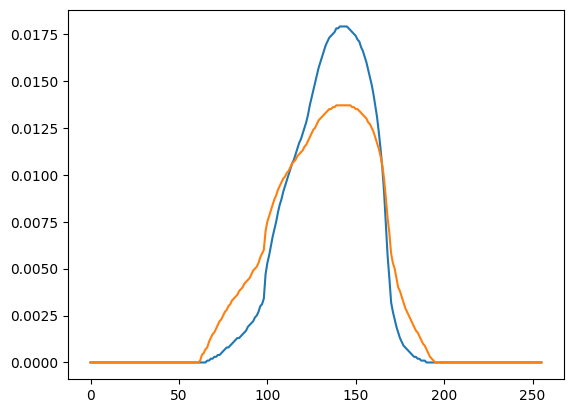

In [38]:
import matplotlib.pyplot as plt

plt.plot(rounded_sharped_dist)
plt.plot(rounded_dist)

In [20]:
sum(distribution1 == distribution2) == data.shape[0]

True